# CAPSTONE PROJECT
# Supervised Machine Learning

# Website Behavior Analysis

## Problem:
### The client is an online ecommerce player. They have shared a user level log data for their browsing behavior (Timestamp, UserId and website section visited). You have been provided with the final conversion data too (Timestamp, UserID, Products Purchased in the transaction, Overall Cart Value).
## Task: 
### Based on this data you are required to build features and model on these characteristics of users to calculate a score/rank for conversion probability of that user. These scores will eventually decide the bidding logic used for each user. Your model will be evaluated on these criteria: -
- a. Feature Engineering (Variable Imputation)
- b. Model Selection Criteria (Basis of choosing the final Technique)
- c. Measurement Criteria (Comparison of Various Models)
- d. Scope for improvement
## Expected Outputs:-
- 1. The Final code (Python or R) along with proper comments
- 2. A summary file (PDF format) stating :
- a. Problem Statement
- b. Approach Taken
- c. Interpretation of Results
- d. Minimal but effective Storyboarding - Consider the final audience of this will be the Business team. You need to bring the actionable insights in this section.

## Importing the Dependencies (Libraries)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Collection & Analysis

### Data 1 -Browsing Data

In [19]:
brows_data=pd.read_csv("Problem2_site_BrowingBehavior.csv", delimiter='\t') 
brows_data.head()

,2017-07-26 00:01:40.965,0,product
0,2017-07-26 00:03:18.448,0,product
1,2017-07-26 00:36:59.028,0,default
2,2017-07-26 00:41:17.273,0,product-listing-category
3,2017-07-26 00:45:39.197,0,content
4,2017-07-26 00:45:48.487,0,home


In [20]:
brows_data.columns=['Timestamp', 'UserID','Website_section_visited']
brows_data

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:03:18.448,0,product
1,2017-07-26 00:36:59.028,0,default
2,2017-07-26 00:41:17.273,0,product-listing-category
3,2017-07-26 00:45:39.197,0,content
4,2017-07-26 00:45:48.487,0,home
...,...,...,...
5535918,2017-07-26 23:18:53.789,9221827579306644828,iroa
5535919,2017-07-26 23:19:03.394,9221827579306644828,iroa
5535920,2017-07-26 23:19:11.569,9221827579306644828,product
5535921,2017-07-26 23:21:56.085,9221827579306644828,product


In [21]:
brows_data.shape

(5535923, 3)

In [22]:
brows_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535923 entries, 0 to 5535922
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 126.7+ MB


In [23]:
brows_data.isnull().sum()

Timestamp                  0
UserID                     0
Website_section_visited    0
dtype: int64

### Data 2 -Final Conversion Data

In [24]:
purchase_data=pd.read_csv("Problem2_FInalConversions.csv", delimiter='\t') 
purchase_data.head()

,2017-07-26 00:00:10.465,0,A293532,52.14
0,2017-07-26 00:00:12.301,0,H209597,31.50
1,2017-07-26 00:00:12.388,0,H211370,30.48
2,2017-07-26 00:00:14.389,0,A282331,51.00
3,2017-07-26 00:00:16.837,0,H211410,16.74
4,2017-07-26 00:00:19.625,0,H211801,34.35


In [25]:
#(Timestamp, UserID, Products Purchased in the transaction, Overall Cart Value).

In [26]:
purchase_data.columns=["Timestamp","UserID","Products_purchased","OverAllCartValue"]
purchase_data.head()

,Timestamp,UserID,Products_purchased,OverAllCartValue
0,2017-07-26 00:00:12.301,0,H209597,31.50
1,2017-07-26 00:00:12.388,0,H211370,30.48
2,2017-07-26 00:00:14.389,0,A282331,51.00
3,2017-07-26 00:00:16.837,0,H211410,16.74
4,2017-07-26 00:00:19.625,0,H211801,34.35


In [27]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79794 entries, 0 to 79793
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           79794 non-null  object 
 1   UserID              79794 non-null  int64  
 2   Products_purchased  79794 non-null  object 
 3   OverAllCartValue    79794 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [28]:
purchase_data.shape

(79794, 4)

In [29]:
purchase_data.isnull().sum()

Timestamp             0
UserID                0
Products_purchased    0
OverAllCartValue      0
dtype: int64

## EDA & Data Visualization

### Most visited page (Section)

In [30]:
brows_data['Website_section_visited'].value_counts()

product                     1855679
product-listing-category     823365
home                         752124
default                      552025
content                      488874
iroa                         428497
cart                         323325
product-listing-search       262481
shoplive                      35810
productNotFound                9333
product-listing-custom         2970
signupcomplete                 1312
mys                              63
error                            60
lorigreiner                       3
wishlist                          1
category                          1
Name: Website_section_visited, dtype: int64

##### Product is most visited section

In [31]:
brows_data['UserID'].value_counts()

0                      1407878
3077341700699443780       3106
7190685980615725949        821
1215902060999829238        723
7188604889406730572        550
                        ...   
4824829275082622114          1
189690486121547271           1
6933394854439024026          1
1563431714403767805          1
2162453962463366463          1
Name: UserID, Length: 516932, dtype: int64

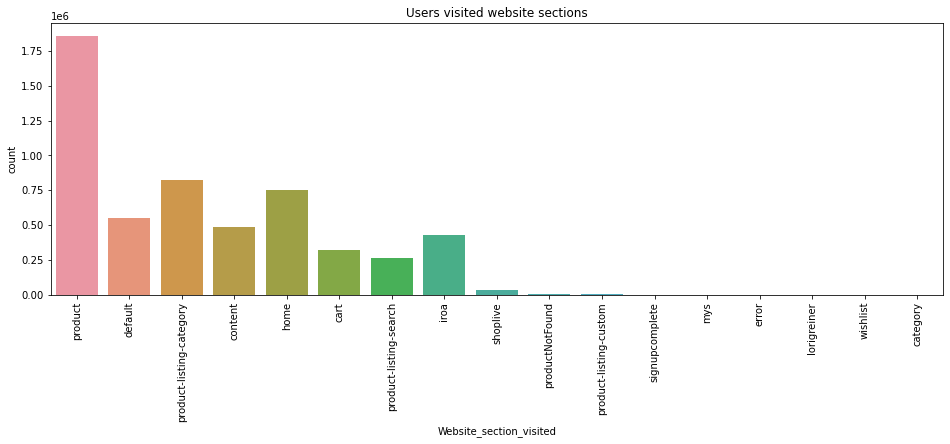

In [32]:
plt.figure(figsize=(16,5))
sns.countplot(brows_data['Website_section_visited'])
plt.title("Users visited website sections")
plt.xticks(rotation=90)
plt.show()

## Is guest user or registered user and which section they visiting respectively

In [33]:
#adding column name to the respective columns
brows_data['isGuestUser'] = brows_data['UserID'].apply(lambda x: x<=0 )
brows_data.head()

,Timestamp,UserID,Website_section_visited,isGuestUser
0,2017-07-26 00:03:18.448,0,product,True
1,2017-07-26 00:36:59.028,0,default,True
2,2017-07-26 00:41:17.273,0,product-listing-category,True
3,2017-07-26 00:45:39.197,0,content,True
4,2017-07-26 00:45:48.487,0,home,True


In [34]:
brows_data['isGuestUser'].value_counts()

False    4128045
True     1407878
Name: isGuestUser, dtype: int64

### out of 5535923 customers visits to website 1407878 are Guest Users

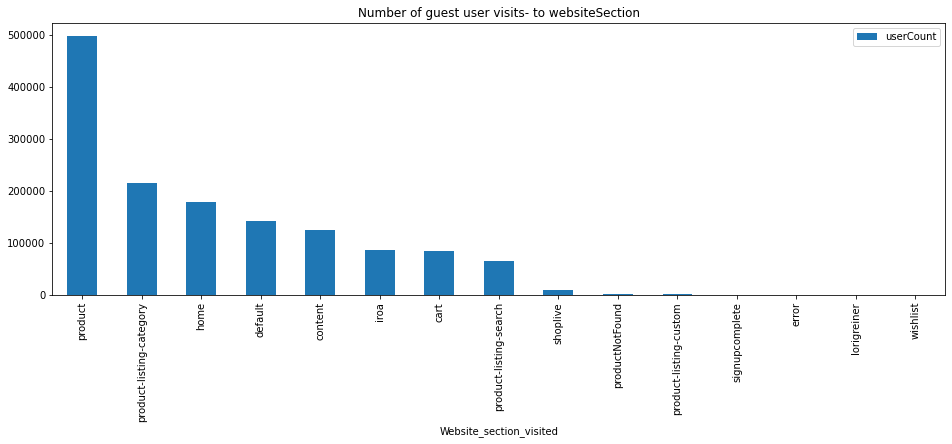

In [35]:
# check how many guest users are on which product

section_analysis= brows_data[brows_data['isGuestUser']==True].groupby('Website_section_visited')['Timestamp'].count().reset_index().rename(columns={'Timestamp': 'userCount'})
section_analysis['percentile']= section_analysis['userCount'].apply(lambda x:x/len(brows_data)*100)

section_analysis = section_analysis.sort_values("userCount",ascending=False)

section_analysis.plot.bar(x="Website_section_visited", y="userCount", rot=90, title="Number of guest user visits- to websiteSection",figsize=(16,5));

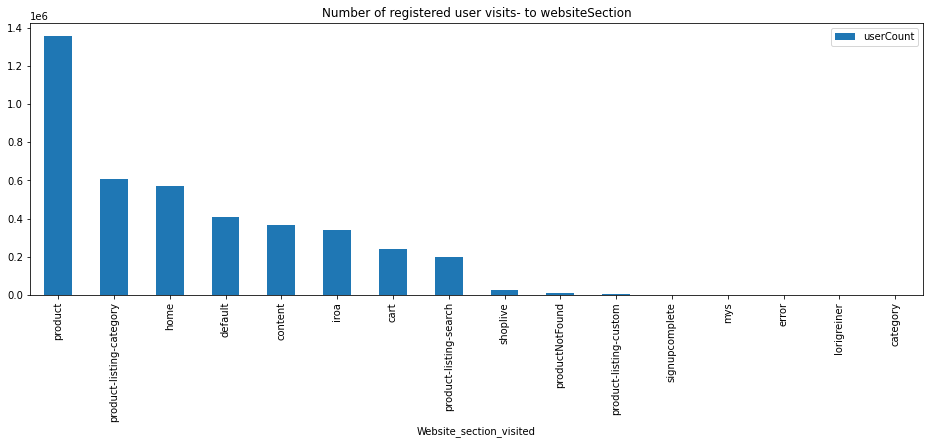

In [36]:
# check how many registered users are on which product
section_analysis= brows_data[brows_data['isGuestUser']==False].groupby('Website_section_visited')['Timestamp'].count().reset_index().rename(columns={'Timestamp': 'userCount'})
section_analysis['percentile']= section_analysis['userCount'].apply(lambda x:x/len(brows_data)*100)

section_analysis = section_analysis.sort_values("userCount",ascending=False)
section_analysis.plot.bar(x="Website_section_visited", y="userCount", rot=90, title="Number of registered user visits- to websiteSection",figsize=(16,5));

### Note :- that the most visited section -> product

In [37]:
brows_data.drop ('isGuestUser', axis=1, inplace=True)
brows_data.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:03:18.448,0,product
1,2017-07-26 00:36:59.028,0,default
2,2017-07-26 00:41:17.273,0,product-listing-category
3,2017-07-26 00:45:39.197,0,content
4,2017-07-26 00:45:48.487,0,home


In [38]:
#adding column name to the respective columns
purchase_data['isGuestUser'] = purchase_data['UserID'].apply(lambda x: x<=0 )

purchase_data.head()

,Timestamp,UserID,Products_purchased,OverAllCartValue,isGuestUser
0,2017-07-26 00:00:12.301,0,H209597,31.50,True
1,2017-07-26 00:00:12.388,0,H211370,30.48,True
2,2017-07-26 00:00:14.389,0,A282331,51.00,True
3,2017-07-26 00:00:16.837,0,H211410,16.74,True
4,2017-07-26 00:00:19.625,0,H211801,34.35,True


,isGuestUser,userCount,percentile
0,False,59598,74.689826
1,True,20196,25.310174


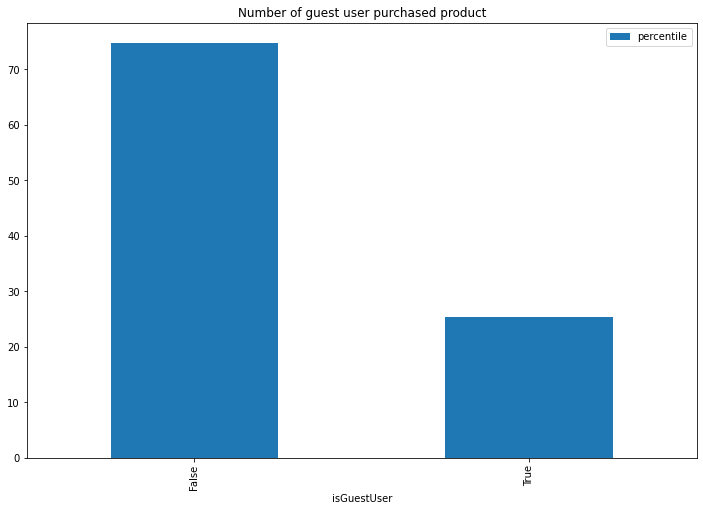

In [39]:
guest_analysis= purchase_data.groupby('isGuestUser')['Timestamp'].count().reset_index().rename(columns={'Timestamp': 'userCount'})

guest_analysis['percentile']= guest_analysis['userCount'].apply(lambda x:x/len(purchase_data)*100)

guest_analysis.head()

guest_analysis.plot.bar(x="isGuestUser", y="percentile", rot=90,title="Number of guest user purchased product",figsize=(12,8));


guest_analysis.head()

## Merging of two data sets

In [40]:
final_data = pd.merge(purchase_data,brows_data,left_index=True,right_index=True)
final_data.head()

,Timestamp_x,UserID_x,Products_purchased,OverAllCartValue,isGuestUser,Timestamp_y,UserID_y,Website_section_visited
0,2017-07-26 00:00:12.301,0,H209597,31.50,True,2017-07-26 00:03:18.448,0,product
1,2017-07-26 00:00:12.388,0,H211370,30.48,True,2017-07-26 00:36:59.028,0,default
2,2017-07-26 00:00:14.389,0,A282331,51.00,True,2017-07-26 00:41:17.273,0,product-listing-category
3,2017-07-26 00:00:16.837,0,H211410,16.74,True,2017-07-26 00:45:39.197,0,content
4,2017-07-26 00:00:19.625,0,H211801,34.35,True,2017-07-26 00:45:48.487,0,home


In [41]:
final_data.drop(columns=['UserID_y'],inplace=True, axis =1)

In [42]:
final_data

,Timestamp_x,UserID_x,Products_purchased,OverAllCartValue,isGuestUser,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:12.301,0,H209597,31.50,True,2017-07-26 00:03:18.448,product
1,2017-07-26 00:00:12.388,0,H211370,30.48,True,2017-07-26 00:36:59.028,default
2,2017-07-26 00:00:14.389,0,A282331,51.00,True,2017-07-26 00:41:17.273,product-listing-category
3,2017-07-26 00:00:16.837,0,H211410,16.74,True,2017-07-26 00:45:39.197,content
4,2017-07-26 00:00:19.625,0,H211801,34.35,True,2017-07-26 00:45:48.487,home
...,...,...,...,...,...,...,...
79789,2017-07-26 23:09:08.202,9174973170462435039,K45766,89.96,False,2017-07-26 00:39:14.899,home
79790,2017-07-26 23:44:19.505,9179943977593655876,V34738,24.66,False,2017-07-26 00:39:14.909,content
79791,2017-07-26 23:53:15.661,9179943977593655876,H210000,21.64,False,2017-07-26 00:39:14.944,home
79792,2017-07-26 23:13:02.55,9211905364441411643,A209343,73.00,False,2017-07-26 00:39:15.161,product


In [43]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79794 entries, 0 to 79793
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp_x              79794 non-null  object 
 1   UserID_x                 79794 non-null  int64  
 2   Products_purchased       79794 non-null  object 
 3   OverAllCartValue         79794 non-null  float64
 4   isGuestUser              79794 non-null  bool   
 5   Timestamp_y              79794 non-null  object 
 6   Website_section_visited  79794 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 4.3+ MB


In [44]:
## making copy for dataset

df_wba = final_data.copy()
df_wba.head()

,Timestamp_x,UserID_x,Products_purchased,OverAllCartValue,isGuestUser,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:12.301,0,H209597,31.50,True,2017-07-26 00:03:18.448,product
1,2017-07-26 00:00:12.388,0,H211370,30.48,True,2017-07-26 00:36:59.028,default
2,2017-07-26 00:00:14.389,0,A282331,51.00,True,2017-07-26 00:41:17.273,product-listing-category
3,2017-07-26 00:00:16.837,0,H211410,16.74,True,2017-07-26 00:45:39.197,content
4,2017-07-26 00:00:19.625,0,H211801,34.35,True,2017-07-26 00:45:48.487,home


In [45]:
final_data.drop(columns=['isGuestUser'],inplace=True, axis =1)
final_data.head(1)

,Timestamp_x,UserID_x,Products_purchased,OverAllCartValue,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:12.301,0,H209597,31.5,2017-07-26 00:03:18.448,product


In [46]:
## how many times a user visited the site

num_of_visits = final_data.groupby('UserID_x')['Website_section_visited'].agg(['count']).reindex()
num_of_visits = num_of_visits.reset_index()
num_of_visits.columns = ['UserID_x','No_of_time_visited']
num_of_visits.drop_duplicates(inplace=True)
num_of_visits

,UserID_x,No_of_time_visited
0,0,20196
1,2941287703,1
2,71023925710020,1
3,394529638495081,1
4,430191686443660,2
...,...,...
41004,9222344977727669611,1
41005,9222827786235385211,1
41006,9222849861047010228,1
41007,9223093682582171386,1


### Change the timestamp to datatime format

In [47]:

final_data['Timestamp_x'] = pd.to_datetime(final_data['Timestamp_x'])
final_data['Timestamp_y'] = pd.to_datetime(final_data['Timestamp_y'])

In [48]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79794 entries, 0 to 79793
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp_x              79794 non-null  datetime64[ns]
 1   UserID_x                 79794 non-null  int64         
 2   Products_purchased       79794 non-null  object        
 3   OverAllCartValue         79794 non-null  float64       
 4   Timestamp_y              79794 non-null  datetime64[ns]
 5   Website_section_visited  79794 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 6.8+ MB


### Caluculate time spend by a user in the section

In [49]:
import datetime
from datetime import timedelta

def find_time_spent(df):
    diff = df['Timestamp_x'] - df['Timestamp_y']
    tol_sec = diff.total_seconds()
    return(abs(tol_sec/60))

In [50]:
final_data['Total_minutes_spent'] = final_data.apply(find_time_spent,axis=1)
final_data.head()

,Timestamp_x,UserID_x,Products_purchased,OverAllCartValue,Timestamp_y,Website_section_visited,Total_minutes_spent
0,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product,3.102450
1,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default,36.777333
2,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category,41.048067
3,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content,45.372667
4,2017-07-26 00:00:19.625,0,H211801,34.35,2017-07-26 00:45:48.487,home,45.481033


In [51]:
final_data.drop(columns=['Timestamp_x','Timestamp_y'],inplace=True,axis=1)
final_data.head()

,UserID_x,Products_purchased,OverAllCartValue,Website_section_visited,Total_minutes_spent
0,0,H209597,31.50,product,3.102450
1,0,H211370,30.48,default,36.777333
2,0,A282331,51.00,product-listing-category,41.048067
3,0,H211410,16.74,content,45.372667
4,0,H211801,34.35,home,45.481033


In [52]:
final_data.UserID_x.value_counts()

0                      20196
6999042003656970156       31
559346213618742389        22
9050159186422090402       20
1536590739380574003       20
                       ...  
8721108960309386090        1
6550192714371123312        1
8875479531064627858        1
6605416823766117807        1
1731797111331025079        1
Name: UserID_x, Length: 41009, dtype: int64

## Feature Engineering
##### adding features by using exiting Features

## Total money spent by user

In [53]:
amount_spent = final_data.groupby('UserID_x')['OverAllCartValue'].agg(['sum']).reindex(final_data['UserID_x']).reset_index()
amount_spent.columns = ['UserID_x','TotalCartValue']
amount_spent.drop_duplicates(inplace=True)
amount_spent

,UserID_x,TotalCartValue
0,0,1375049.52
547,5942997097932061,157.95
548,23951842225160889,60.96
550,30833658052409950,216.12
551,33873861847792934,53.24
...,...,...
79784,9138020064668426621,38.68
79785,9138678094731427197,42.72
79786,9162285675244079016,104.28
79788,9168488389924043940,35.48


## Number of product purchased by user

In [54]:
purchased_quantity = final_data.groupby('UserID_x')['OverAllCartValue'].agg(['count']).reindex(final_data['UserID_x']).reset_index()
purchased_quantity.columns = ['UserID_x','Total_products_purchased']
purchased_quantity.drop_duplicates(inplace=True)
purchased_quantity

,UserID_x,Total_products_purchased
0,0,20196
547,5942997097932061,1
548,23951842225160889,2
550,30833658052409950,5
551,33873861847792934,1
...,...,...
79784,9138020064668426621,1
79785,9138678094731427197,1
79786,9162285675244079016,2
79788,9168488389924043940,1


## Merge all datasets

In [55]:
final_data = pd.merge(final_data,num_of_visits,left_index=True,right_index=True)
final_data.head(1)

,UserID_x_x,Products_purchased,OverAllCartValue,Website_section_visited,Total_minutes_spent,UserID_x_y,No_of_time_visited
0,0,H209597,31.5,product,3.10245,0,20196


In [56]:
final_data = pd.merge(final_data,amount_spent,left_index=True,right_index=True)
final_data.head(1)

,UserID_x_x,Products_purchased,OverAllCartValue,Website_section_visited,Total_minutes_spent,UserID_x_y,No_of_time_visited,UserID_x,TotalCartValue
0,0,H209597,31.5,product,3.10245,0,20196,0,1375049.52


In [57]:
final_data = pd.merge(final_data,purchased_quantity,left_index=True,right_index=True)
final_data.head(1)

,UserID_x_x,Products_purchased,OverAllCartValue,Website_section_visited,Total_minutes_spent,UserID_x_y,No_of_time_visited,UserID_x_x,TotalCartValue,UserID_x_y,Total_products_purchased
0,0,H209597,31.5,product,3.10245,0,20196,0,1375049.52,0,20196


In [58]:
final_data.shape

(19830, 11)

In [59]:
final_data.drop_duplicates(inplace=True)
final_data.shape

(19830, 11)

In [60]:
df_wba = final_data.copy()
df_wba.head()

,UserID_x_x,Products_purchased,OverAllCartValue,Website_section_visited,Total_minutes_spent,UserID_x_y,No_of_time_visited,UserID_x_x,TotalCartValue,UserID_x_y,Total_products_purchased
0,0,H209597,31.50,product,3.102450,0,20196,0,1375049.52,0,20196
547,5942997097932061,K43931,157.95,product,0.449517,120823407765375575,1,5942997097932061,157.95,5942997097932061,1
548,23951842225160889,H211370,33.48,product-listing-search,26.025000,120846192109693471,3,23951842225160889,60.96,23951842225160889,2
550,30833658052409950,H211394,44.68,content,54.915333,121356317219818676,1,30833658052409950,216.12,30833658052409950,5
551,33873861847792934,H211800,53.24,product,10.063067,121576504431711518,1,33873861847792934,53.24,33873861847792934,1


In [61]:
final_data.drop(columns=['UserID_x_x','UserID_x_y',],inplace=True,axis=1)
final_data

,Products_purchased,OverAllCartValue,Website_section_visited,Total_minutes_spent,No_of_time_visited,TotalCartValue,Total_products_purchased
0,H209597,31.50,product,3.102450,20196,1375049.52,20196
547,K43931,157.95,product,0.449517,1,157.95,1
548,H211370,33.48,product-listing-search,26.025000,3,60.96,2
550,H211394,44.68,content,54.915333,1,216.12,5
551,H211800,53.24,product,10.063067,1,53.24,1
...,...,...,...,...,...,...,...
41003,A281816,105.86,product-listing-category,856.985867,1,135.82,2
41004,A302091,89.95,product-listing-search,843.631617,1,89.95,1
41005,A293532,49.14,cart,816.368967,1,79.14,2
41006,A299296,42.00,product-listing-search,835.334100,1,78.00,2


In [62]:
final_data.drop_duplicates(inplace=True)
final_data.shape

(19830, 7)

## Final Data

In [63]:
final_data.head()

,Products_purchased,OverAllCartValue,Website_section_visited,Total_minutes_spent,No_of_time_visited,TotalCartValue,Total_products_purchased
0,H209597,31.50,product,3.102450,20196,1375049.52,20196
547,K43931,157.95,product,0.449517,1,157.95,1
548,H211370,33.48,product-listing-search,26.025000,3,60.96,2
550,H211394,44.68,content,54.915333,1,216.12,5
551,H211800,53.24,product,10.063067,1,53.24,1


## Checking Correlation 

In [64]:
final_data.corr()

,OverAllCartValue,Total_minutes_spent,No_of_time_visited,TotalCartValue,Total_products_purchased
OverAllCartValue,1.000000,0.061517,-0.001979,0.012669,-0.002324
Total_minutes_spent,0.061517,1.000000,-0.006565,-0.005973,-0.007270
No_of_time_visited,-0.001979,-0.006565,1.000000,0.999786,0.999932
TotalCartValue,0.012669,-0.005973,0.999786,1.000000,0.999835
Total_products_purchased,-0.002324,-0.007270,0.999932,0.999835,1.000000


<AxesSubplot:>

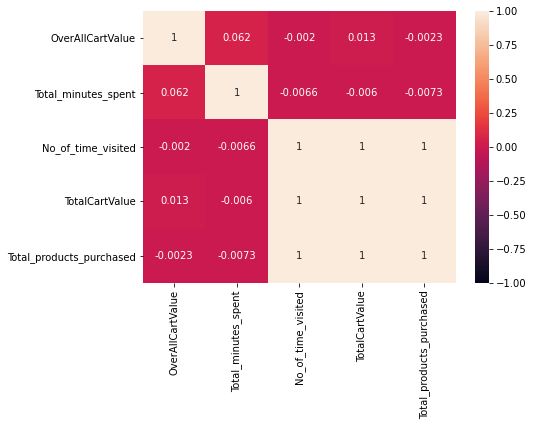

In [65]:
plt.figure(figsize=(7,5))
sns.heatmap(final_data.corr(),annot=True,vmin=-1)

In [66]:
final_data.drop(columns=['Products_purchased','OverAllCartValue','Website_section_visited'],inplace=True,axis=1)

In [67]:
final_data.head(1)

,Total_minutes_spent,No_of_time_visited,TotalCartValue,Total_products_purchased
0,3.10245,20196,1375049.52,20196


Calculate Buying Probability

In [68]:
final_data['Buy_Probability'] = (final_data['Total_products_purchased']/final_data['No_of_time_visited'])
final_data

,Total_minutes_spent,No_of_time_visited,TotalCartValue,Total_products_purchased,Buy_Probability
0,3.102450,20196,1375049.52,20196,1.000000
547,0.449517,1,157.95,1,1.000000
548,26.025000,3,60.96,2,0.666667
550,54.915333,1,216.12,5,5.000000
551,10.063067,1,53.24,1,1.000000
...,...,...,...,...,...
41003,856.985867,1,135.82,2,2.000000
41004,843.631617,1,89.95,1,1.000000
41005,816.368967,1,79.14,2,2.000000
41006,835.334100,1,78.00,2,2.000000


Calculate user Rank or Score

In [69]:
final_data['User_rank'] = (final_data['Buy_Probability'] * final_data['TotalCartValue'])
final_data

,Total_minutes_spent,No_of_time_visited,TotalCartValue,Total_products_purchased,Buy_Probability,User_rank
0,3.102450,20196,1375049.52,20196,1.000000,1375049.52
547,0.449517,1,157.95,1,1.000000,157.95
548,26.025000,3,60.96,2,0.666667,40.64
550,54.915333,1,216.12,5,5.000000,1080.60
551,10.063067,1,53.24,1,1.000000,53.24
...,...,...,...,...,...,...
41003,856.985867,1,135.82,2,2.000000,271.64
41004,843.631617,1,89.95,1,1.000000,89.95
41005,816.368967,1,79.14,2,2.000000,158.28
41006,835.334100,1,78.00,2,2.000000,156.00


### Deleting Guest data

In [70]:
final_data.drop(final_data.index[0],inplace=True)
final_data

,Total_minutes_spent,No_of_time_visited,TotalCartValue,Total_products_purchased,Buy_Probability,User_rank
547,0.449517,1,157.95,1,1.000000,157.95
548,26.025000,3,60.96,2,0.666667,40.64
550,54.915333,1,216.12,5,5.000000,1080.60
551,10.063067,1,53.24,1,1.000000,53.24
552,14.423817,1,52.48,2,2.000000,104.96
...,...,...,...,...,...,...
41003,856.985867,1,135.82,2,2.000000,271.64
41004,843.631617,1,89.95,1,1.000000,89.95
41005,816.368967,1,79.14,2,2.000000,158.28
41006,835.334100,1,78.00,2,2.000000,156.00


## Save data to a CSV file

In [71]:
final_data.to_csv('WebsiteBehavioral_Final_data.csv',index=False)

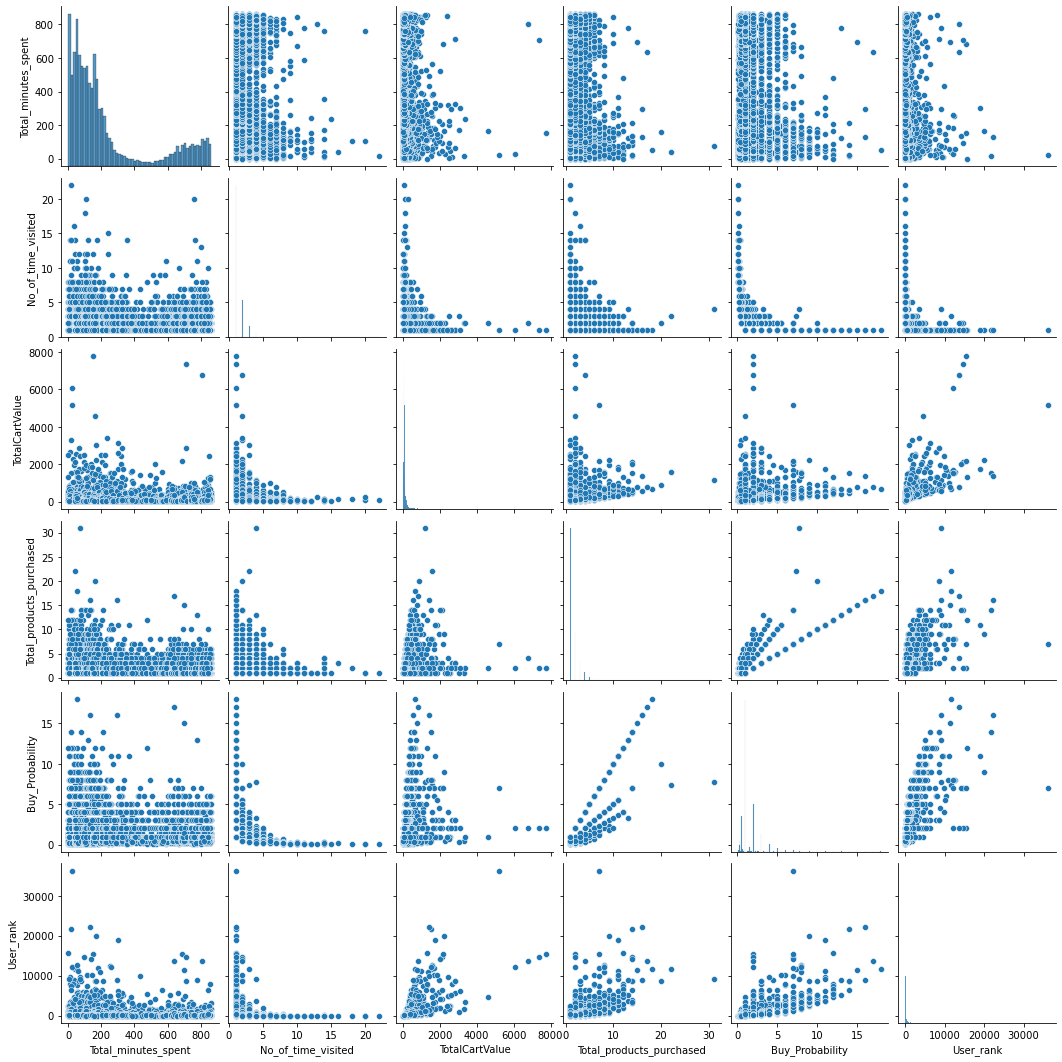

In [72]:
sns.pairplot(final_data)

<AxesSubplot:xlabel='No_of_time_visited', ylabel='Total_products_purchased'>

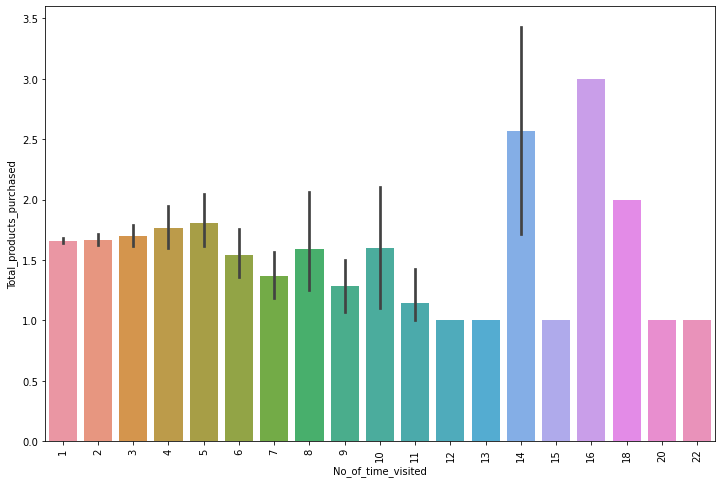

In [73]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(final_data['No_of_time_visited'],final_data.Total_products_purchased)

### Buy_Probability is Output so this Regression problem
##### By above Pairplot  
- K_Nearest_Neighbour or - Random Forest can be best for solution

## Machine_Learning
### models to be Used
- Linear Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- K_NearestNeighbour

# Model Building and Performance Evaluation

## Train_Test_Split

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [86]:
X = final_data.drop(['Buy_Probability'],axis=1)
y = final_data['Buy_Probability']

In [87]:
X

,Total_minutes_spent,No_of_time_visited,TotalCartValue,Total_products_purchased,User_rank
547,0.449517,1,157.95,1,157.95
548,26.025000,3,60.96,2,40.64
550,54.915333,1,216.12,5,1080.60
551,10.063067,1,53.24,1,53.24
552,14.423817,1,52.48,2,104.96
...,...,...,...,...,...
41003,856.985867,1,135.82,2,271.64
41004,843.631617,1,89.95,1,89.95
41005,816.368967,1,79.14,2,158.28
41006,835.334100,1,78.00,2,156.00


In [88]:
y

547      1.000000
548      0.666667
550      5.000000
551      1.000000
552      2.000000
           ...   
41003    2.000000
41004    1.000000
41005    2.000000
41006    2.000000
41008    1.000000
Name: Buy_Probability, Length: 19829, dtype: float64

In [89]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [90]:
X

array([[-0.93408277, -0.43545939,  0.28980257, -0.51179076, -0.07708109],
       [-0.83368302,  1.46165677, -0.22332931,  0.25812798, -0.23132498],
       [-0.72027041, -0.43545939,  0.59755472,  2.56788421,  1.1360561 ],
       ...,
       [ 2.26891086, -0.43545939, -0.12714684,  0.25812798, -0.0766472 ],
       [ 2.34336086, -0.43545939, -0.13317808,  0.25812798, -0.07964503],
       [ 2.37707609, -0.43545939,  1.40584721, -0.51179076,  0.20028442]])

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [92]:
X_train.shape

(13880, 5)

In [93]:
X_test.shape

(5949, 5)

# Linear Regression

In [94]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [95]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [96]:
pred_train = lm.predict(X_train)

In [97]:
accuracy_lm = r2_score(y_train,pred_train)
accuracy_lm

0.8743879162187272

In [166]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [167]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [169]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Buy_Probability   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 1.932e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        09:51:33   Log-Likelihood:                -7966.2
No. Observations:               13880   AIC:                         1.594e+04
Df Residuals:                   13874   BIC:                         1.599e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4037      0.004    384.892      0.0

In [174]:
lmt= LinearRegression()
lmt.fit(X_test,y_test)
rfe1 = RFE(lm, 10)
rfe1 = rfe1.fit(X_test, y_test)

In [175]:
X_test = sm.add_constant(X_test)
lmt = sm.OLS(y_test,X_test).fit()
print(lmt.summary())

                            OLS Regression Results                            
Dep. Variable:        Buy_Probability   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     8459.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        09:56:35   Log-Likelihood:                -3206.1
No. Observations:                5949   AIC:                             6424.
Df Residuals:                    5943   BIC:                             6464.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3957      0.005    259.336      0.0

In [98]:
pred_test = lm.predict(X_test)

In [99]:
accuracy_lm_test = r2_score(y_test,pred_test)
accuracy_lm_test

0.8758506952872831

In [100]:
evl_metric_lm_train = pd.DataFrame({'Model':'LinearRegession_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                    "MAE":mean_squared_error(y_train,pred_train),
                                   "R2_score":r2_score(y_train,pred_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [101]:
evl_metric_lm_train

,Model,RMSE,MAE,R2_score
0,LinearRegession_train,0.429555,0.184518,0.874388


In [102]:
evl_metric_lm_test = pd.DataFrame({'Model':'LinearRegession_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                    "MAE":mean_squared_error(y_test,pred_test),
                                   "R2_score":r2_score(y_test,pred_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_lm_test

,Model,RMSE,MAE,R2_score
0,LinearRegession_test,0.416373,0.173366,0.875851


# Decision Tree

In [103]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [104]:
pred_train = dt_model.predict(X_train)

In [105]:
accuracy_dt = r2_score(y_train,pred_train)
accuracy_dt

1.0

In [106]:
pred_test = dt_model.predict(X_test)

In [107]:
accuracy_dt_test = r2_score(y_test,pred_test)
accuracy_dt_test

0.9987831775566429

In [108]:
evl_metric_dt_train = pd.DataFrame({'Model':'DecisionTree_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                    "MAE":mean_squared_error(y_train,pred_train),
                                   "R2_score":r2_score(y_train,pred_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_dt_test = pd.DataFrame({'Model':'DecisionTree_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                    "MAE":mean_squared_error(y_test,pred_test),
                                   "R2_score":r2_score(y_test,pred_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_dt_train

,Model,RMSE,MAE,R2_score
0,DecisionTree_train,3.750756e-17,1.406817e-33,1.0


In [109]:
evl_metric_dt_test

,Model,RMSE,MAE,R2_score
0,DecisionTree_test,0.041222,0.001699,0.998783


# Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [111]:
pred_train = rf.predict(X_train)

In [112]:
accuracy_rf = r2_score(y_train,pred_train)
accuracy_rf

0.9997548410772316

In [113]:
pred_test = rf.predict(X_test)

In [114]:
accuracy_rf_test = r2_score(y_test,pred_test)
accuracy_rf_test

0.9987198116356868

In [115]:
evl_metric_rf_train = pd.DataFrame({'Model':'RandomForest_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                    "MAE":mean_squared_error(y_train,pred_train),
                                   "R2_score":r2_score(y_train,pred_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_rf_train

,Model,RMSE,MAE,R2_score
0,RandomForest_train,0.018977,0.00036,0.999755


In [116]:
evl_metric_rf_test = pd.DataFrame({'Model':'RandomForest_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                    "MAE":mean_squared_error(y_test,pred_test),
                                   "R2_score":r2_score(y_test,pred_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_rf_test

,Model,RMSE,MAE,R2_score
0,RandomForest_test,0.042281,0.001788,0.99872


## Random Forest Hyper-Parameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

n_estimators = [150,200,250]
max_features = ['auto','sqrt']
max_depth = [10,15,20]
min_samples_split =[5,15,20]
bootstrap = [True,False]

param = {'n_estimators':n_estimators,
        'max_features':max_features,
        'max_depth':max_depth,
        'min_samples_split':min_samples_split,
        'bootstrap':bootstrap}

gridseach_cv_rf = GridSearchCV(rf,param_grid=param,cv=5,verbose=3)
gridseach_cv_rf.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150, score=0.999, total=   1.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150, score=0.999, total=   1.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150, score=0.996, total=   1.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150, score=0.998, total=   1.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150, score=0.996, total=   1.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, score=0.999, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, score=0.998, total=   2.6s
[CV] bootstrap=True, ma

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250, score=0.997, total=   4.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250, score=0.993, total=   4.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250, score=0.993, total=   4.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250, score=0.988, total=   4.9s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=150 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=150, score=0.996, total=   2.1s
[CV] bootstrap=T

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200, score=0.988, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200, score=0.994, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200, score=0.992, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200, score=0.987, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200, score=0.984, total=   3.1s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_split=15, n_estimators=250, score=0.991, total=   4.9s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150, score=0.995, total=   2.7s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150, score=0.997, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150, score=0.993, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  bootstrap=True, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150, score=0.994, total=   2.9s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=200, score=0.991, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=200 
[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=200, score=0.986, total=   2.9s
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=250 
[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=250, score=0.992, total=   3.7s
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=250 
[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=250, score=0.995, total=   3.3s
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=250 
[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=250, score=0.992, total=   3.5s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150, score=0.994, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150, score=0.996, total=   1.9s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150, score=0.991, total=   1.9s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=200, score=0.996, total=30.6min
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=200, score=0.998, total= 7.3min
[CV] bootstrap

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250, score=0.997, total=   2.2s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250, score=0.997, total=   2.2s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250, score=0.995, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250, score=0.994, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=15, n_estimators=150 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=15, n_estimators=150, score=0.991, total=   2.1s
[CV] bootstrap=True, 

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=150, score=0.998, total=   4.1s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, score=0.999, total=   5.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, score=0.996, total=   5.7s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, score=0.999, total=   5.5s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200, score=0.997, total=   5.2s
[CV] bootstrap

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250, score=0.993, total=   6.8s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250, score=0.995, total=   6.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_split=20, n_estimators=250, score=0.991, total=   7.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=150 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=150, score=0.997, total=   3.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=150 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=150, score=0.998, total=   3.1s
[CV] boot

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200, score=0.991, total=   3.7s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200, score=0.994, total=   3.7s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200, score=0.994, total=   3.7s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200, score=0.992, total=   3.5s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=20, n_estimators=200, score=0.988, total=   3.6s
[CV] 

[CV]  bootstrap=False, max_depth=15, max_features=auto, min_samples_split=15, n_estimators=250, score=0.995, total=   5.7s
[CV] bootstrap=False, max_depth=15, max_features=auto, min_samples_split=15, n_estimators=250 
[CV]  bootstrap=False, max_depth=15, max_features=auto, min_samples_split=15, n_estimators=250, score=0.995, total=   5.0s
[CV] bootstrap=False, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  bootstrap=False, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150, score=0.995, total=   4.1s
[CV] bootstrap=False, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  bootstrap=False, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150, score=0.991, total=   3.9s
[CV] bootstrap=False, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150 
[CV]  bootstrap=False, max_depth=15, max_features=auto, min_samples_split=20, n_estimators=150, score=0.993, total=   4.1s
[CV] 

[CV]  bootstrap=False, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=200, score=0.996, total=   3.7s
[CV] bootstrap=False, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=200 
[CV]  bootstrap=False, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=200, score=0.995, total=   3.4s
[CV] bootstrap=False, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=200 
[CV]  bootstrap=False, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=200, score=0.994, total=   3.7s
[CV] bootstrap=False, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=200 
[CV]  bootstrap=False, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=200, score=0.990, total=   3.7s
[CV] bootstrap=False, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=250 
[CV]  bootstrap=False, max_depth=15, max_features=sqrt, min_samples_split=15, n_estimators=250, score=0.994, total=   4.6s
[CV] 

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=250, score=0.998, total=   7.0s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150, score=0.996, total=   3.9s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150, score=0.995, total=   4.1s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150, score=0.996, total=   4.1s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_split=15, n_estimators=150, score=0.995, total=   3.9s
[CV] b

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200, score=0.997, total=   4.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200, score=0.996, total=   3.9s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200, score=0.994, total=   3.9s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250, score=0.997, total=   4.6s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=250, score=0.998, total=   5.1s
[CV] bootstrap

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 470.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 15, 20],
                         'n_estimators': [150, 200, 250]},
             verbose=3)

In [119]:
print(gridseach_cv_rf.best_score_)
print(gridseach_cv_rf.best_estimator_.get_params())

0.997721160535523
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [120]:
rf_tuned = RandomForestRegressor(**gridseach_cv_rf.best_params_)
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, min_samples_split=5,
                      n_estimators=150)

In [121]:
pred_rf_tune_train = rf_tuned.predict(X_train)

In [122]:
evl_metric_rf_tuned_train = pd.DataFrame({'Model':'RandomForest_tuned_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_rf_tune_train)),
                                    "MAE":mean_squared_error(y_train,pred_rf_tune_train),
                                   "R2_score":r2_score(y_train,pred_rf_tune_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_rf_tuned_train 

,Model,RMSE,MAE,R2_score
0,RandomForest_tuned_train,0.014149,0.0002,0.999864


In [123]:
pred_rf_tune_test = rf_tuned.predict(X_test)

In [124]:
evl_metric_rf_tuned_test = pd.DataFrame({'Model':'RandomForest_tuned_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_rf_tune_test)),
                                    "MAE":mean_squared_error(y_test,pred_rf_tune_test),
                                   "R2_score":r2_score(y_test,pred_rf_tune_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_rf_tuned_test

,Model,RMSE,MAE,R2_score
0,RandomForest_tuned_test,0.037089,0.001376,0.999015


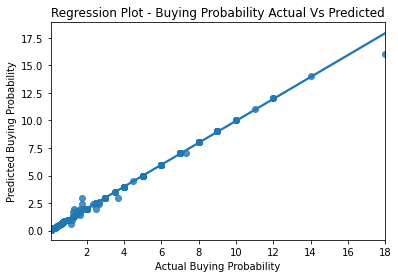

In [125]:
sns.regplot(x=y_test,y=pred_rf_tune_test)
plt.xlabel("Actual Buying Probability")
plt.ylabel("Predicted Buying Probability")
plt.title("Regression Plot - Buying Probability Actual Vs Predicted")
plt.show()

### Feature importance

<AxesSubplot:title={'center':'Feature Importance'}>

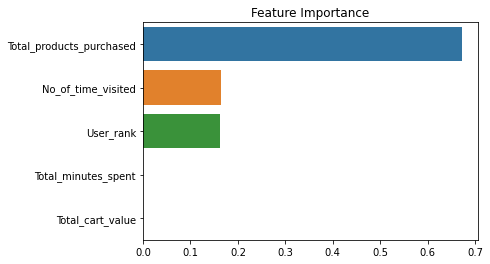

In [126]:
Feature_importance = pd.Series(data = rf_tuned.feature_importances_, 
                               index=['Total_minutes_spent',
                                      'No_of_time_visited',
                                      'Total_cart_value',
                                      'Total_products_purchased',
                                      'User_rank']).sort_values(ascending=False)
plt.title("Feature Importance")
sns.barplot(y=Feature_importance.index,x=Feature_importance.values,orient ='h')

# KNN

In [127]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [128]:
pred_train = knn.predict(X_train)

In [129]:
accuracy_knn = r2_score(y_train,pred_train)
accuracy_knn

0.9974865944555193

In [130]:
pred_test = knn.predict(X_test)

In [131]:
accuracy_knn_test = r2_score(y_test,pred_test)
accuracy_knn_test

0.9913863277002045

In [132]:
evl_metric_knn_train = pd.DataFrame({'Model':'KNN_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                    "MAE":mean_squared_error(y_train,pred_train),
                                   "R2_score":r2_score(y_train,pred_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_knn_test = pd.DataFrame({'Model':'KNN_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                    "MAE":mean_squared_error(y_test,pred_test),
                                   "R2_score":r2_score(y_test,pred_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

evl_metric_knn_train

,Model,RMSE,MAE,R2_score
0,KNN_train,0.060762,0.003692,0.997487


In [133]:
evl_metric_knn_test

,Model,RMSE,MAE,R2_score
0,KNN_test,0.109674,0.012028,0.991386


## KNN Hyper-Parameter Tuning

In [134]:
from sklearn.model_selection import GridSearchCV
n_neighbors=[2,3,5,7,9]
weights= ['uniform','distance']
leaf_size=[20,30,50]
p=[1,2,5]
metric=['minkowski','Euclidean']
    



param = {'n_neighbors':n_neighbors,
        'weights':weights,
        'leaf_size':leaf_size,
        'p':p,
        'metric':metric}

gridseach_cv_knn = GridSearchCV(knn,param_grid=param,cv=5,verbose=3)
gridseach_cv_knn.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.985, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.992, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.990, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.996, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.993, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=distance, score=0.988, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=distance, score=0.991, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=distance, score=0.993, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=2, p=1, weights=distance, score=0.997, total=   0.1s
[CV] leaf_

[CV]  leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.980, total=   0.3s
[CV] leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.989, total=   0.3s
[CV] leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.989, total=   0.3s
[CV] leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.991, total=   0.3s
[CV] leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.987, total=   0.3s
[CV] leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=3, p=5, weights=distance, score=0.983, total=   0.3s
[CV] leaf_size=2

[CV]  leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.987, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.989, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.992, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=7, p=2, weights=uniform 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=7, p=2, weights=uniform, score=0.983, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=7, p=2, weights=uniform 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=7, p=2, weights=uniform, score=0.990, total=   0.1s
[CV] leaf_size=20, metric=minkowski, n_neighbors=7, p=2, weights=uniform 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=7, p=2, weights=uniform, score=0.986, total=   0.1s
[CV] leaf_siz

[CV]  leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=uniform, score=0.985, total=   0.3s
[CV] leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.988, total=   0.4s
[CV] leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.991, total=   0.3s
[CV] leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.987, total=   0.3s
[CV] leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.988, total=   0.3s
[CV] leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=20, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.987, total=   0.3s
[CV] lea

[CV]  leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=uniform, score=nan, total=   0.0s
[CV] leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=20, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=20, m

[CV]  leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.985, total=   0.1s
[CV] leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.992, total=   0.1s
[CV] leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.990, total=   0.1s
[CV] leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.996, total=   0.1s
[CV] leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.993, total=   0.1s
[CV] leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=distance 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=2, p=1, weights=distance, score=0.988, total=   0.1s
[CV] leaf_size=3

[CV]  leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance, score=0.992, total=   0.1s
[CV] leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance, score=0.994, total=   0.1s
[CV] leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance, score=0.990, total=   0.1s
[CV] leaf_size=30, metric=minkowski, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.980, total=   0.4s
[CV] leaf_size=30, metric=minkowski, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.989, total=   0.3s
[CV] leaf_size=30, metric=minkowski, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.989, total=   0.3s
[CV] leaf_siz

[CV]  leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.991, total=   0.2s
[CV] leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.993, total=   0.2s
[CV] leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.987, total=   0.2s
[CV] leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.989, total=   0.1s
[CV] leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.992, total=   0.1s
[CV] leaf_size=30, metric=minkowski, n_neighbors=7, p=2, weights=uniform 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=7, p=2, weights=uniform, score=0.983, total=   0.2s
[CV] leaf

[CV]  leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=uniform, score=0.985, total=   0.4s
[CV] leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=uniform, score=0.984, total=   0.4s
[CV] leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=uniform, score=0.985, total=   0.4s
[CV] leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.988, total=   0.4s
[CV] leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.991, total=   0.4s
[CV] leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=30, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.987, total=   0.4s
[CV] leaf_si

[CV]  leaf_size=30, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=30, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=30, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=30, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=30, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=30, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=30, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=30, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=30, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=30, metric=Euclidean, n_neighbors=5, p=5, weights=uniform 
[CV]  leaf_size=30, metric=Euclidean, n_neighbors=5, p=5, weights=uniform, score=nan, total=   0.0s
[CV] leaf_size=30, me

[CV]  leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.985, total=   0.1s
[CV] leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.992, total=   0.1s
[CV] leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.990, total=   0.1s
[CV] leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.996, total=   0.1s
[CV] leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=uniform 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=uniform, score=0.993, total=   0.1s
[CV] leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=distance 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=2, p=1, weights=distance, score=0.988, total=   0.1s
[CV] leaf_size=5

[CV]  leaf_size=50, metric=minkowski, n_neighbors=3, p=2, weights=distance, score=0.992, total=   0.1s
[CV] leaf_size=50, metric=minkowski, n_neighbors=3, p=2, weights=distance 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=3, p=2, weights=distance, score=0.994, total=   0.1s
[CV] leaf_size=50, metric=minkowski, n_neighbors=3, p=2, weights=distance 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=3, p=2, weights=distance, score=0.990, total=   0.1s
[CV] leaf_size=50, metric=minkowski, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.980, total=   0.5s
[CV] leaf_size=50, metric=minkowski, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.989, total=   0.5s
[CV] leaf_size=50, metric=minkowski, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=3, p=5, weights=uniform, score=0.989, total=   0.5s
[CV] leaf_siz

[CV]  leaf_size=50, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.991, total=   0.2s
[CV] leaf_size=50, metric=minkowski, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.993, total=   0.1s
[CV] leaf_size=50, metric=minkowski, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.987, total=   0.2s
[CV] leaf_size=50, metric=minkowski, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.989, total=   0.1s
[CV] leaf_size=50, metric=minkowski, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=7, p=1, weights=distance, score=0.992, total=   0.2s
[CV] leaf_size=50, metric=minkowski, n_neighbors=7, p=2, weights=uniform 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=7, p=2, weights=uniform, score=0.983, total=   0.1s
[CV] leaf

[CV]  leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=uniform, score=0.985, total=   0.6s
[CV] leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=uniform, score=0.984, total=   0.6s
[CV] leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=uniform, score=0.985, total=   0.6s
[CV] leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.988, total=   0.6s
[CV] leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.991, total=   0.6s
[CV] leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=50, metric=minkowski, n_neighbors=9, p=5, weights=distance, score=0.987, total=   0.6s
[CV] leaf_si

[CV]  leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=uniform, score=nan, total=   0.0s
[CV] leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=50, metric=Euclidean, n_neighbors=5, p=2, weights=distance, score=nan, total=   0.0s
[CV] leaf_size=50, m

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=2),
             param_grid={'leaf_size': [20, 30, 50],
                         'metric': ['minkowski', 'Euclidean'],
                         'n_neighbors': [2, 3, 5, 7, 9], 'p': [1, 2, 5],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [135]:
print(gridseach_cv_knn.best_score_)
print(gridseach_cv_knn.best_estimator_.get_params())

0.9925473152849543
{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [136]:
knn_tuned = KNeighborsRegressor(**gridseach_cv_knn.best_params_)
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(leaf_size=20, n_neighbors=2, p=1, weights='distance')

In [137]:
pred_knn_tune_train = knn_tuned.predict(X_train)

In [138]:
evl_metric_knn_tuned_train = pd.DataFrame({'Model':'KNN_tuned_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_knn_tune_train)),
                                    "MAE":mean_squared_error(y_train,pred_knn_tune_train),
                                   "R2_score":r2_score(y_train,pred_knn_tune_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_knn_tuned_train 

,Model,RMSE,MAE,R2_score
0,KNN_tuned_train,0.0,0.0,1.0


In [139]:
pred_knn_tune_test = knn_tuned.predict(X_test)

In [140]:
evl_metric_knn_tuned_test = pd.DataFrame({'Model':'KNN_tuned_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_knn_tune_test)),
                                    "MAE":mean_squared_error(y_test,pred_knn_tune_test),
                                   "R2_score":r2_score(y_test,pred_knn_tune_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_knn_tuned_test

,Model,RMSE,MAE,R2_score
0,KNN_tuned_test,0.075234,0.00566,0.995947


# SVM

In [141]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [142]:
pred_train = svr.predict(X_train)

In [143]:
accuracy_svr = r2_score(y_train,pred_train)
accuracy_svr

0.9420411460044247

In [144]:
pred_test = svr.predict(X_test)

In [145]:
accuracy_svr_test = r2_score(y_test,pred_test)
accuracy_svr_test

0.9503383558590401

In [147]:
evl_metric_svr_train = pd.DataFrame({'Model':'SVR_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                    "MAE":mean_squared_error(y_train,pred_train),
                                   "R2_score":r2_score(y_train,pred_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])
evl_metric_svr_test = pd.DataFrame({'Model':'SVR_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                    "MAE":mean_squared_error(y_test,pred_test),
                                   "R2_score":r2_score(y_test,pred_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

evl_metric_svr_train

,Model,RMSE,MAE,R2_score
0,SVR_train,0.291785,0.085139,0.942041


In [148]:
evl_metric_svr_test

,Model,RMSE,MAE,R2_score
0,SVR_test,0.263342,0.069349,0.950338


# RESULTS :- Model Comparison 

In [149]:
model_metric = pd.concat([evl_metric_lm_train,evl_metric_lm_test,evl_metric_dt_train,evl_metric_dt_test,evl_metric_rf_train,evl_metric_rf_test,evl_metric_rf_tuned_train,evl_metric_rf_tuned_test,evl_metric_knn_train,evl_metric_knn_test,evl_metric_knn_tuned_train,evl_metric_knn_tuned_test,evl_metric_svr_train,evl_metric_svr_test],ignore_index=True)
model_metric

,Model,RMSE,MAE,R2_score
0,LinearRegession_train,4.295553e-01,1.845177e-01,0.874388
1,LinearRegession_test,4.163728e-01,1.733663e-01,0.875851
2,DecisionTree_train,3.750756e-17,1.406817e-33,1.000000
3,DecisionTree_test,4.122151e-02,1.699213e-03,0.998783
4,RandomForest_train,1.897698e-02,3.601260e-04,0.999755
5,RandomForest_test,4.228119e-02,1.787699e-03,0.998720
6,RandomForest_tuned_train,1.414871e-02,2.001860e-04,0.999864
7,RandomForest_tuned_test,3.708925e-02,1.375613e-03,0.999015
8,KNN_train,6.076236e-02,3.692065e-03,0.997487
9,KNN_test,1.096742e-01,1.202843e-02,0.991386


In [150]:
model_metric.sort_values(by='RMSE',ascending=True)

,Model,RMSE,MAE,R2_score
10,KNN_tuned_train,0.000000e+00,0.000000e+00,1.000000
2,DecisionTree_train,3.750756e-17,1.406817e-33,1.000000
6,RandomForest_tuned_train,1.414871e-02,2.001860e-04,0.999864
4,RandomForest_train,1.897698e-02,3.601260e-04,0.999755
7,RandomForest_tuned_test,3.708925e-02,1.375613e-03,0.999015
3,DecisionTree_test,4.122151e-02,1.699213e-03,0.998783
5,RandomForest_test,4.228119e-02,1.787699e-03,0.998720
8,KNN_train,6.076236e-02,3.692065e-03,0.997487
11,KNN_tuned_test,7.523394e-02,5.660145e-03,0.995947
9,KNN_test,1.096742e-01,1.202843e-02,0.991386


# Conclusion
- Data is trained with all Regression Models.
- all models have best accuracy
- Accuracy achieved with most models 
                                     - 99% with training data
                                     - 99% with test data
###      Random Forest or KNN can be best for Building a Good Model.


# Scope for Improvements
  This is a good Model but always There is room for Improvements 
- With more features
- With Gathering more data
- Try with different hyperparameters

### Thank You 